<a href="https://colab.research.google.com/github/benvictoria21/python-panda/blob/master/Women_in_Chess_An_Overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as ws
ws.filterwarnings ("ignore")
sns.set(font_scale=1.3)
sns.set_style("dark")
sns.set_palette('Set2')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria21/python-panda/master/python%20pandas%20data/datasets_816231_1397485_top_women_chess_players_aug_2020.csv")
df.head()

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0,wi
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,NaN
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,NaN
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,NaN
4,700088,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN,wi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8553 entries, 0 to 8552
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fide id          8553 non-null   int64  
 1   Name             8553 non-null   object 
 2   Federation       8553 non-null   object 
 3   Gender           8553 non-null   object 
 4   Year_of_birth    8261 non-null   float64
 5   Title            3118 non-null   object 
 6   Standard_Rating  8553 non-null   int64  
 7   Rapid_rating     3608 non-null   float64
 8   Blitz_rating     3472 non-null   float64
 9   Inactive_flag    5852 non-null   object 
dtypes: float64(3), int64(2), object(5)
memory usage: 668.3+ KB


In [4]:
top_10_players = df.head(10)
top_10_players

,Fide id,Name,Federation,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,F,1976.0,GM,2675,2646.0,2736.0,wi
1,8602980,"Hou, Yifan",CHN,F,1994.0,GM,2658,2621.0,2601.0,NaN
2,5008123,"Koneru, Humpy",IND,F,1987.0,GM,2586,2483.0,2483.0,NaN
3,4147103,"Goryachkina, Aleksandra",RUS,F,1998.0,GM,2582,2502.0,2441.0,NaN
4,700088,"Polgar, Susan",HUN,F,1969.0,GM,2577,NaN,NaN,wi
5,8600147,"Xie, Jun",CHN,F,1970.0,GM,2574,NaN,NaN,wi
6,8603006,"Ju, Wenjun",CHN,F,1991.0,GM,2560,2610.0,2536.0,NaN
7,14109336,"Lagno, Kateryna",RUS,F,1989.0,GM,2546,2521.0,2608.0,NaN
8,14114550,"Muzychuk, Mariya",UKR,F,1992.0,GM,2544,2506.0,2326.0,NaN
9,12801259,"Cmilyte, Viktorija",LTU,F,1983.0,GM,2538,2394.0,2435.0,wi


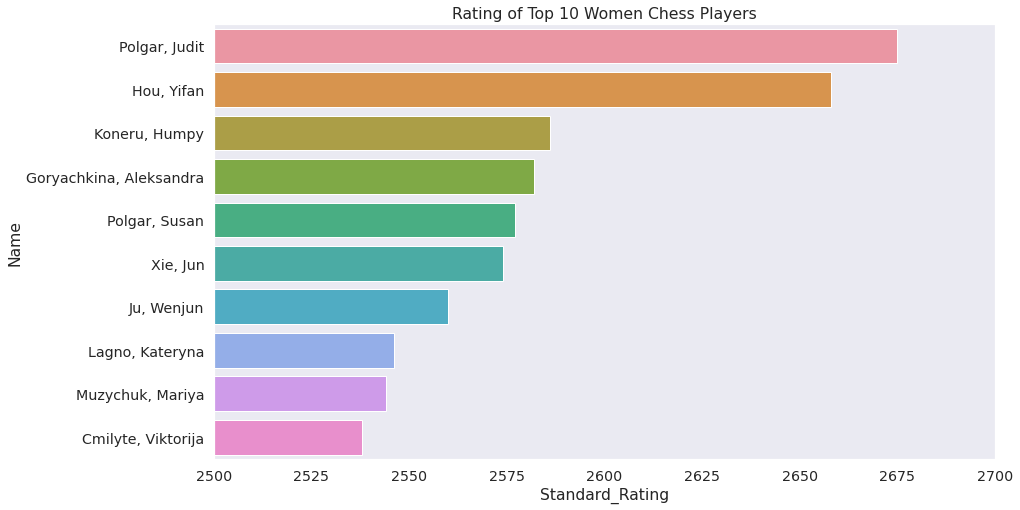

In [5]:
# Rating of Top 10 Chess Players
plt.figure(figsize=(14,8))
plt.title("Rating of Top 10 Women Chess Players")
sns.barplot(x = "Standard_Rating", y = "Name", data=top_10_players).set_xlim(2500, 2700)
plt.show()

In [6]:
df_active = df[df.Inactive_flag != 'wi']
birth_year = df_active.Year_of_birth
current_year = 2020
age_value =  current_year - birth_year
print(f"Average age of active women chess players is {round(np.nanmean(age_value), 1)} years.")

Average age of active women chess players is 29.5 years.


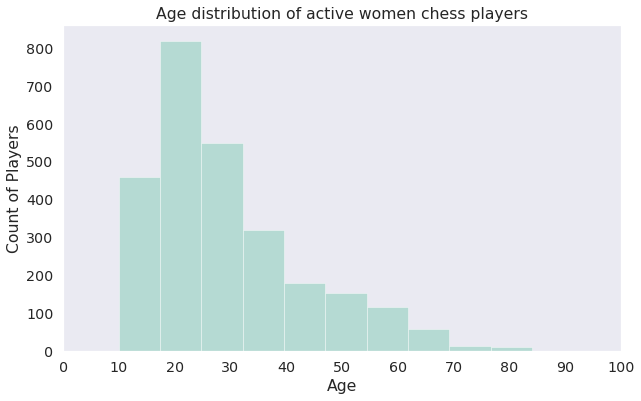

In [7]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(age_value,  bins = 10, kde=False)
ax.set_ylabel('Count of Players')
ax.set_xlabel('Age')
ax.set_xticks(range(0,101,10))
plt.title("Age distribution of active women chess players")
plt.show()

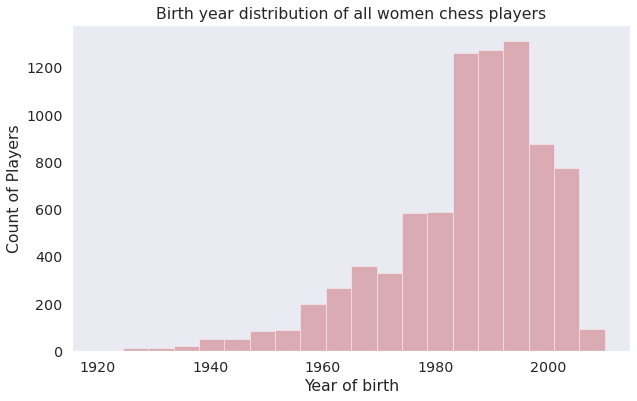

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(df.Year_of_birth,  bins = 20, kde=False, color='r')
ax.set_ylabel('Count of Players')
ax.set_xlabel('Year of birth')
plt.title("Birth year distribution of all women chess players")
plt.show()

  index  Title
0   WFM   1545
1   WIM    809
2   WGM    316
3   WCM    247
4    IM    119
5    GM     37
6    FM     36
7    CM      8
8    WH      1


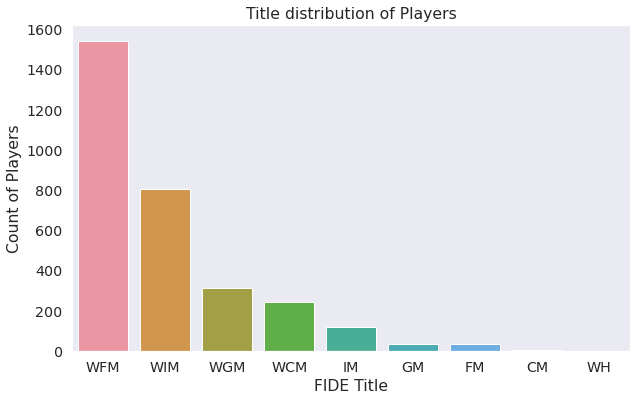

In [9]:
title_dist = df.Title.value_counts().reset_index()
print(title_dist)
fig, ax = plt.subplots(figsize=(10,6))
plt.title("Title distribution of Players")
sns.barplot(x = "index", y = "Title", data = title_dist)
ax.set_xlabel('FIDE Title')
ax.set_ylabel('Count of Players')
plt.show()

  Title  Standard_Rating
0    GM          2482.84
1    IM          2354.10
2   WGM          2245.35
3    FM          2188.14
4   WIM          2129.17
5    WH          2080.00
6   WFM          2049.09
7    CM          2017.88
8   WCM          1929.95


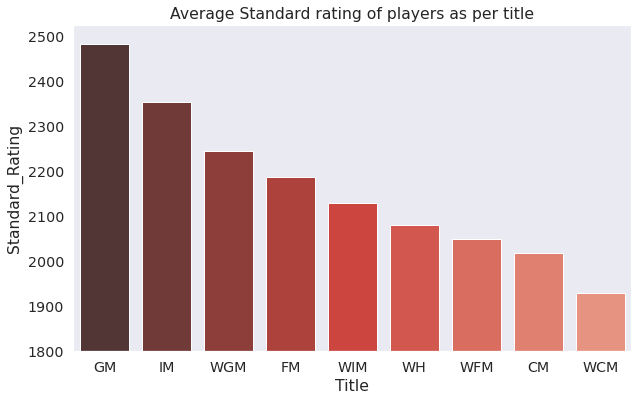

In [10]:
avg_std_rating_per_title = round(df.groupby("Title")["Standard_Rating"].mean(), 2).reset_index().sort_values(by='Standard_Rating', ascending=False).reset_index(drop=True)
print(avg_std_rating_per_title)
plt.figure(figsize=(10,6))
plt.title("Average Standard rating of players as per title")
sns.barplot(x = "Title", y="Standard_Rating", data=avg_std_rating_per_title, palette="Reds_d").set_ylim(1800, 2525)
plt.show()

  Title  Rapid_rating
0    GM       2444.27
1    IM       2297.93
2   WGM       2199.22
3   WIM       2066.25
4    FM       2023.55
5   WFM       1951.98
6    CM       1833.83
7   WCM       1794.81
8    WH           NaN


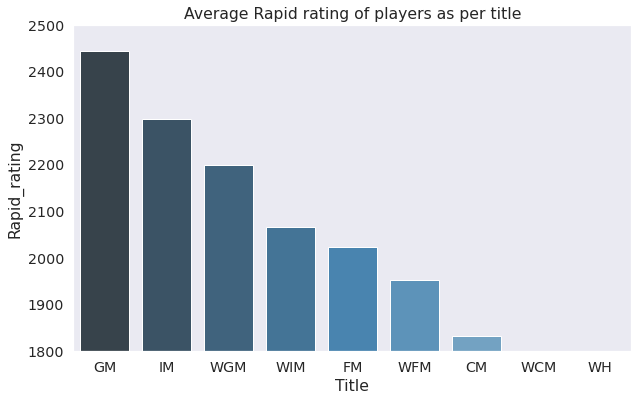

In [11]:
avg_rapid_rating_per_title = round(df.groupby("Title")["Rapid_rating"].mean(), 2).reset_index().sort_values(by='Rapid_rating', ascending=False).reset_index(drop=True)
print(avg_rapid_rating_per_title)
plt.figure(figsize=(10,6))
plt.title("Average Rapid rating of players as per title")
sns.barplot(x = "Title", y="Rapid_rating", data=avg_rapid_rating_per_title, palette="Blues_d").set_ylim(1800, 2500)
plt.show()

  Title  Blitz_rating
0    GM       2414.94
1    IM       2258.86
2   WGM       2181.45
3   WIM       2045.32
4    FM       2008.71
5   WFM       1935.86
6    CM       1810.00
7   WCM       1786.87
8    WH           NaN


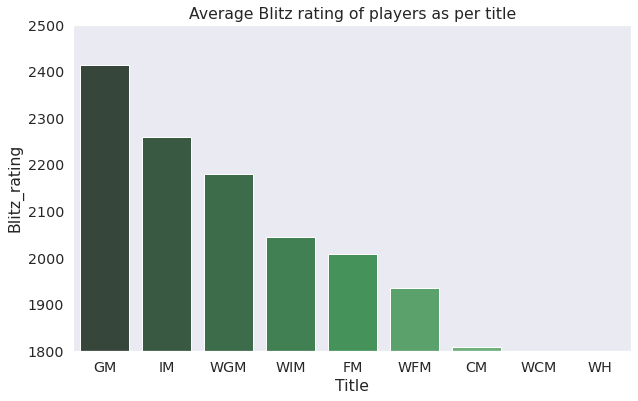

In [12]:
avg_blitz_rating_per_title = round(df.groupby("Title")["Blitz_rating"].mean(), 2).reset_index().sort_values(by='Blitz_rating', ascending=False).reset_index(drop=True)
print(avg_blitz_rating_per_title)
plt.figure(figsize=(10,6))
plt.title("Average Blitz rating of players as per title")
sns.barplot(x = "Title", y="Blitz_rating", data=avg_blitz_rating_per_title, palette="Greens_d").set_ylim(1800, 2500)
plt.show()

   Country  Total players
1      RUS           1698
2      GER            621
3      POL            384
4      UKR            287
5      IND            284
6      ESP            251
7      FRA            246
8      CUB            235
9      HUN            215
10     SRB            199


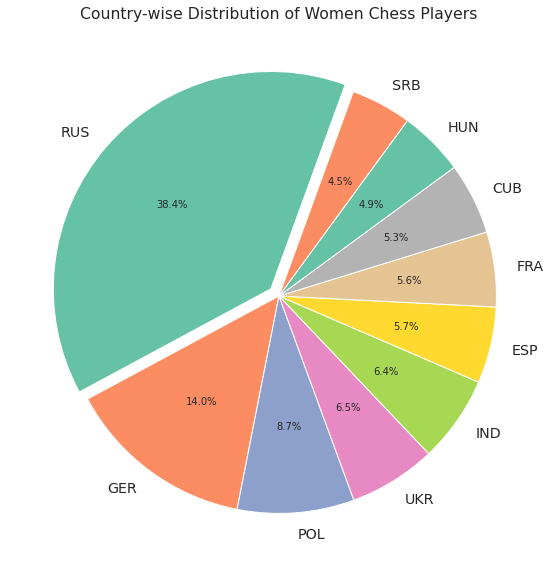

In [13]:
countries_dist = df.Federation.value_counts().reset_index().rename(columns={'index':'Country', 'Federation':'Total players'})[:10]
countries_dist.index += 1
print(countries_dist)

# Pie chart of Country-wise distribution of Chess Players 
labels = countries_dist['Country']
sizes = countries_dist['Total players']
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.05,0,0,0,0,0,0,0,0,0)
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', startangle=70)
plt.title("Country-wise Distribution of Women Chess Players")
plt.show()

   Country  Total players
1      RUS           1698
2      GER            621
3      POL            384
4      UKR            287
5      IND            284
6      ESP            251
7      FRA            246
8      CUB            235
9      HUN            215
10     SRB            199


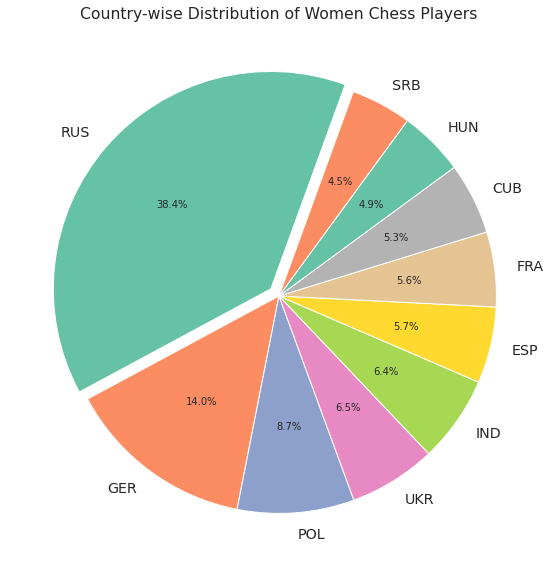

In [14]:
countries_dist = df.Federation.value_counts().reset_index().rename(columns={'index':'Country', 'Federation':'Total players'})[:10]
countries_dist.index += 1
print(countries_dist)

# Pie chart of Country-wise distribution of Chess Players 
labels = countries_dist['Country']
sizes = countries_dist['Total players']
fig1, ax1 = plt.subplots(figsize=(10,10))
explode = (0.05,0,0,0,0,0,0,0,0,0)
ax1.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', startangle=70)
plt.title("Country-wise Distribution of Women Chess Players")
plt.show()

  Country  Total GMs
0     CHN          7
1     RUS          6
2     GEO          5
3     UKR          4
4     HUN          3
5     IND          2
6     LTU          1
7     FRA          1
8     POL          1
9     SWE          1


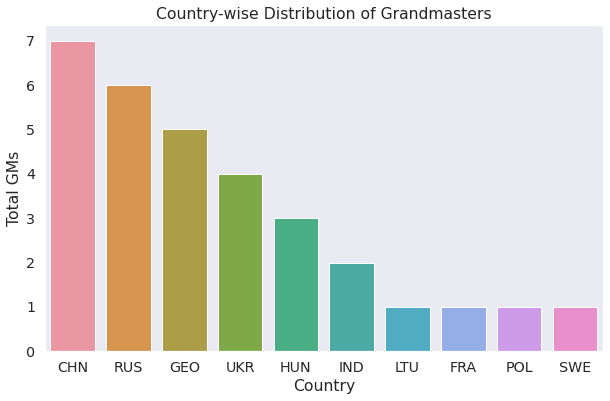

In [15]:
countries_dist = df[df.Title=='GM'].Federation.value_counts().reset_index().rename(columns={'index':'Country', 'Federation':'Total GMs'})[:10]
print(countries_dist)
plt.figure(figsize=(10,6))
plt.title("Country-wise Distribution of Grandmasters")
sns.barplot(x = "Country", y="Total GMs", data=countries_dist)
plt.show()